In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import tensorflow as tf
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import sys
sys.path.append('..')
from dataset import batcher

In [5]:
MODEL_DIR = '../saved_models/'
LR_RATE = 0.001
OPT = tf.keras.optimizers.Adam(learning_rate=LR_RATE)
LOSS = 'MeanSquaredError'
METRICS = ['RootMeanSquaredError']

In [17]:
# Get test split
# bands = ['BLUE', 'GREEN', 'RED', 'NIR', 'SW_IR1', 'SW_IR2', 'TEMP', 'VIIRS', 'DELTA_TEMP', 'CO']
bands = ['VIIRS']
test_batcher = batcher.Batcher(bands, country_year="pollution-2018", bucket=False, shuffle=False, split='custom', repeat=1, batch_size=3000).get_dataset()
x_true = []
y_true = []
for x, y in test_batcher:
    x_true.append(x)
    y_true.append(y)

print(np.shape(x_true))

(1, 500, 224, 224, 1)


In [18]:
# Load model
experiments = ['imagery_sample_cnn_regression_NL']

def load_model_from_dir(model_name):
    model_path = MODEL_DIR + model_name + '.h5'
    model = tf.keras.models.load_model(model_path, compile=False)
    
    return model

In [19]:
# Get consumption predictions
trained_model = load_model_from_dir(experiments[0])
trained_model.compile(
            loss=LOSS,
            optimizer=OPT,
            metrics=METRICS,
        )

y_preds = trained_model.predict_on_batch(x_true)
print(y_preds)

2023-02-20 16:22:48.262514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[[-1.26233613e+00]
 [-5.59559870e+00]
 [-1.74511695e+00]
 [-5.48408175e+00]
 [ 4.19649601e-01]
 [ 1.49866417e-01]
 [-5.38136148e+00]
 [-5.43126822e+00]
 [-6.11131630e+01]
 [-1.34995568e+00]
 [-5.61535788e+00]
 [-4.23378038e+00]
 [-4.14056873e+00]
 [-5.70174885e+00]
 [ 4.49362069e-01]
 [-5.37799644e+00]
 [-1.86740339e+00]
 [-5.51943922e+00]
 [-4.21892214e+00]
 [-5.48653364e+00]
 [-5.28191805e+00]
 [-5.51661634e+00]
 [-2.43071151e+00]
 [-5.51943922e+00]
 [-5.60514975e+00]
 [-5.56207800e+00]
 [-5.32549095e+00]
 [-5.59736395e+00]
 [-5.60404778e+00]
 [-5.29464912e+00]
 [-2.03236103e+00]
 [-5.18893290e+00]
 [-5.55838728e+00]
 [-3.61555409e+00]
 [-5.38945246e+00]
 [-5.62531042e+00]
 [-5.21278191e+00]
 [-5.54153061e+00]
 [-2.44466996e+00]
 [-5.54615259e+00]
 [-5.46252489e+00]
 [-4.88810921e+00]
 [-5.65328979e+00]
 [-5.36056709e+00]
 [-1.13648927e+00]
 [-5.48303938e+00]
 [-5.61437225e+00]
 [-3.75727892e-01]
 [-5.66039085e+00]
 [-5.73382664e+00]
 [-5.60423183e+00]
 [ 7.78059483e-01]
 [ 6.6447031

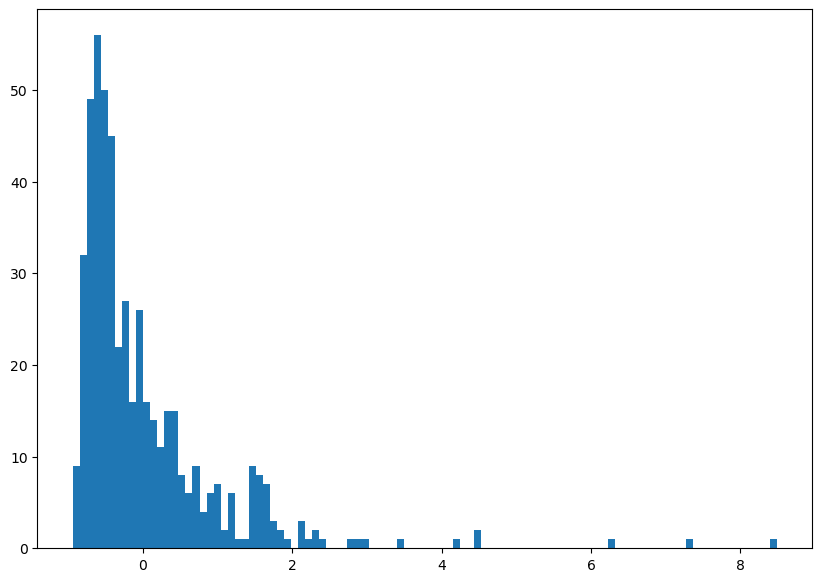

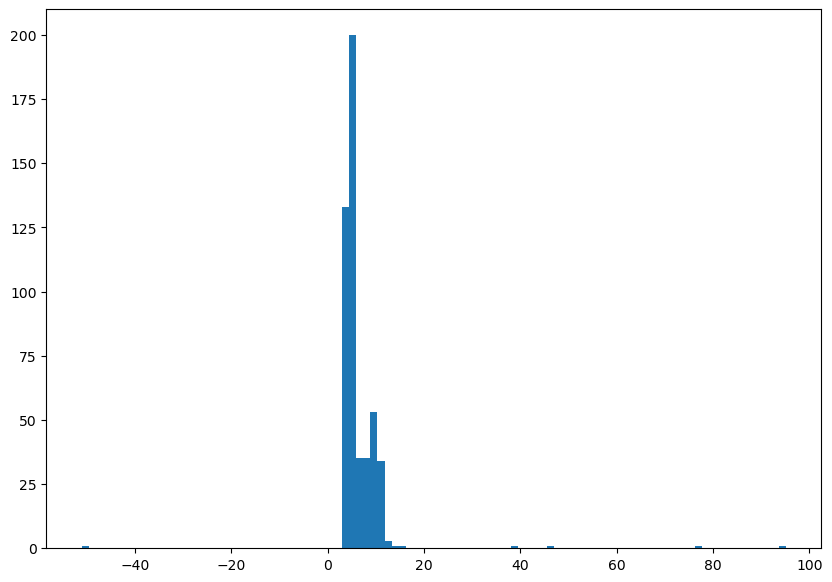

In [20]:
# Find r-squared
y_true = np.squeeze(y_true)
y_preds = np.squeeze(y_preds)
y_preds = y_preds + 10

# Plot histograms
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_true, bins = 100)
plt.show()

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_preds, bins = 100)
plt.show()



r2 = pearsonr(y_true, y_preds)[0]

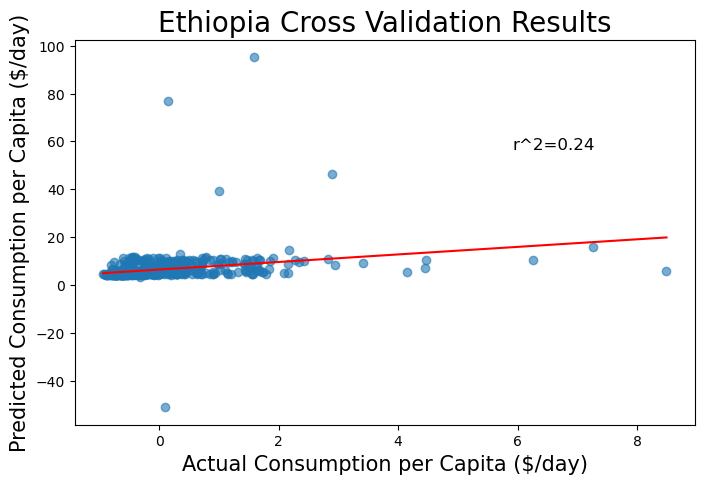

In [21]:
# Plot predictions
country = 'Ethiopia'
fig = plt.figure(figsize=(8,5))
plt.scatter(y_true, y_preds, alpha=0.6)
plt.plot(np.unique(y_true), np.poly1d(np.polyfit(y_true, y_preds, 1))(np.unique(y_true)), color='red')
plt.text(0.5, 0.5, f'r^2={round(r2, 2)}', ha='left', va='top', size=12, transform=ax.transAxes)
plt.xlabel('Actual Consumption per Capita ($/day)', fontsize=15)
plt.ylabel('Predicted Consumption per Capita ($/day)', fontsize=15)
plt.title(f'{country} Cross Validation Results', fontsize=20)
# plt.xlim([np.min(y_true), 10])
# plt.ylim([-2, np.max(y_preds)])
plt.show()